In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math
import random
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка данных

In [42]:
df_train = pd.read_csv("/content/drive/MyDrive/datasets/tabular_series/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/datasets/tabular_series/test.csv")

In [44]:
df_test_Id = df_test['Id']

In [ ]:
''' del df_train_small
del df_test_small
del df_train_small_clean
del df_train_small_clean2 '''

In [43]:
# подвыборка для быстрого анализа фичей или тестирования
df_train_small = df_train.loc[random.sample(list(df_train.index.unique()), int(df_train.size/1000))]
df_test_small = df_test.loc[random.sample(list(df_test.index.unique()), int(df_test.size/1000))]

In [45]:
def reduce_mean_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] =='int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min> np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    
    if verbose:
        print('Memory usage is decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem)/ start_mem))
    
    return df

In [6]:
df_train = reduce_mean_usage(df_train)
df_test = reduce_mean_usage(df_test)

Memory usage is decreased to 259.40 Mb (84.8% reduction)
Memory usage is decreased to 63.90 Mb (84.8% reduction)


In [ ]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,1931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,2557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,1803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,857,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,431,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Dup_Rows = df_train[df_train.duplicated()]

In [ ]:
# повторяющихся значений нет
Dup_Rows.size

0

In [ ]:
df_train.Cover_Type.unique()

array([1, 2, 3, 6, 7, 4, 5])

## EDA

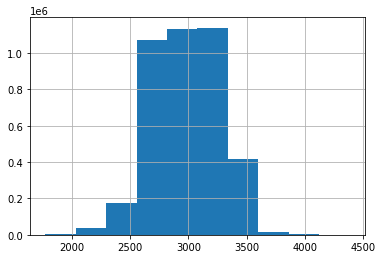

In [ ]:
df_train.Elevation.hist()

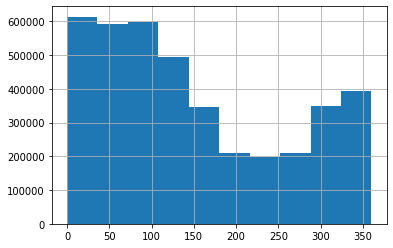

In [ ]:
df_train.Aspect.hist()

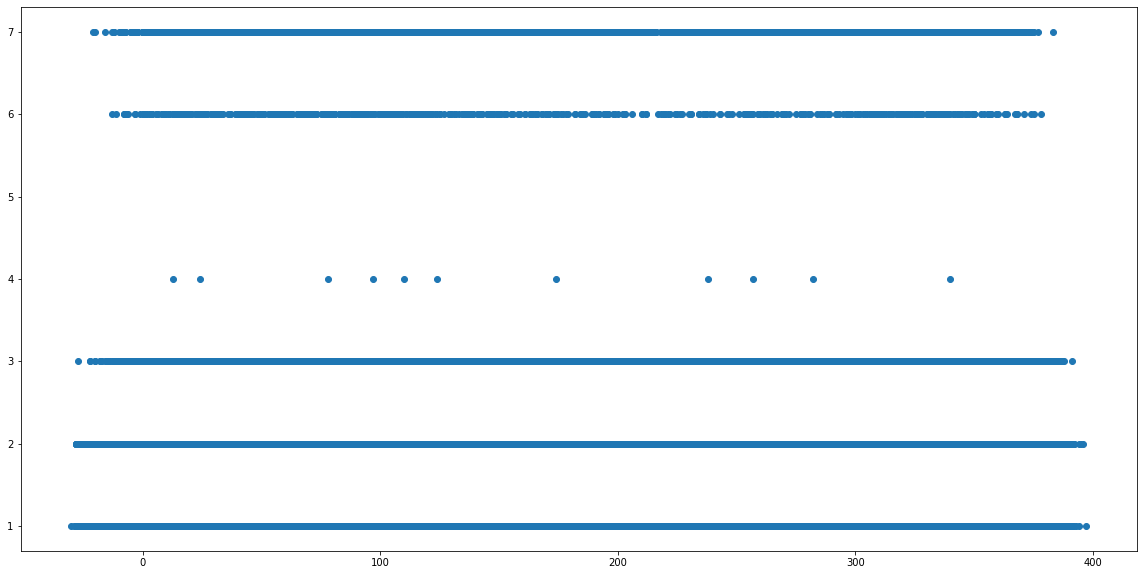

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(df_train_small.Aspect,df_train_small.Cover_Type)

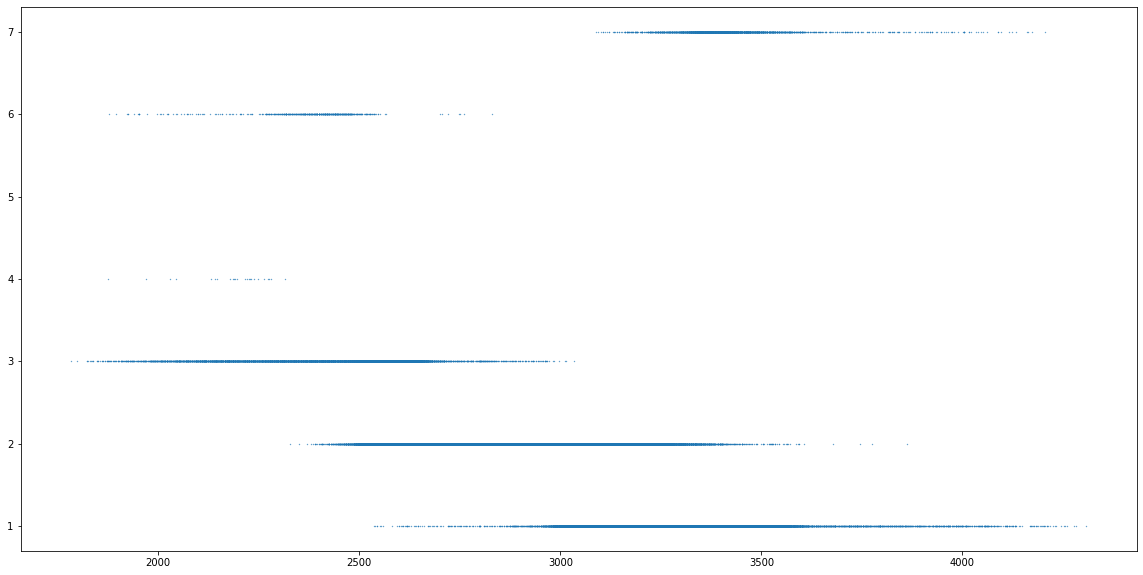

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(df_train_small.Elevation,df_train_small.Cover_Type,s=0.1)

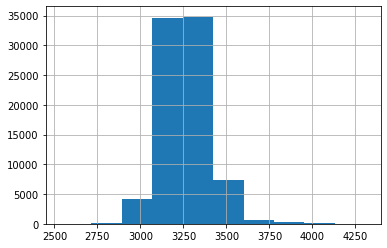

In [ ]:
df_train_small[df_train_small.Cover_Type == 1].Elevation.hist()

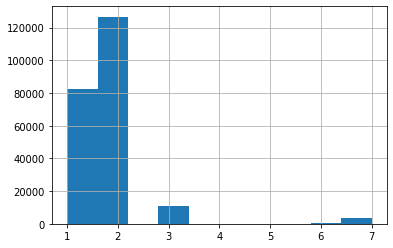

In [ ]:
df_train_small.Cover_Type.hist()

In [ ]:
df_train_small_clean = df_train_small[(np.abs(stats.zscore(df_train_small['Elevation'])) < 3)]

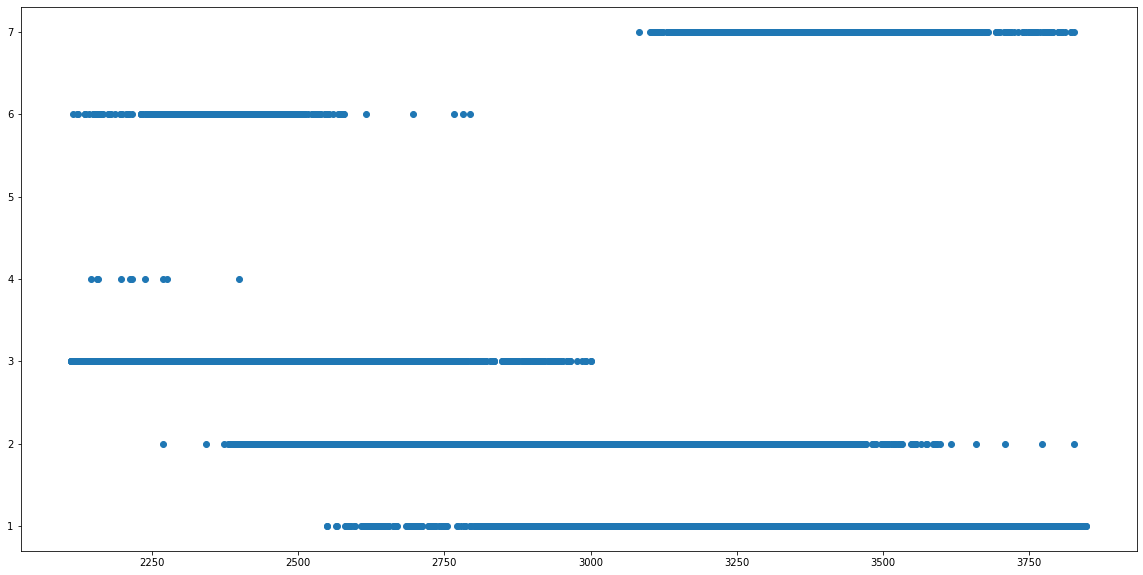

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(df_train_small_clean.Elevation,df_train_small_clean.Cover_Type)

In [ ]:
df_train_small_clean.info

<bound method DataFrame.info of               Id  Elevation  Aspect  ...  Soil_Type39  Soil_Type40  Cover_Type
3107775  3107775       3395     171  ...            0            0           1
205785    205785       3196      26  ...            0            0           1
2236111  2236111       2829     -10  ...            0            0           2
1531438  1531438       2683      92  ...            0            0           2
2431614  2431614       2829     336  ...            0            0           2
...          ...        ...     ...  ...          ...          ...         ...
457348    457348       2973      52  ...            0            0           2
2189646  2189646       3077     271  ...            0            0           2
1625467  1625467       2748     258  ...            0            0           2
1482727  1482727       3250     182  ...            0            0           1
131247    131247       3281      14  ...            0            0           1

[218178 rows x 56 c

In [ ]:
df_train_small.info

<bound method DataFrame.info of               Id  Elevation  Aspect  ...  Soil_Type39  Soil_Type40  Cover_Type
3107775  3107775       3395     171  ...            0            0           1
205785    205785       3196      26  ...            0            0           1
2236111  2236111       2829     -10  ...            0            0           2
1531438  1531438       2683      92  ...            0            0           2
2431614  2431614       2829     336  ...            0            0           2
...          ...        ...     ...  ...          ...          ...         ...
457348    457348       2973      52  ...            0            0           2
2189646  2189646       3077     271  ...            0            0           2
1625467  1625467       2748     258  ...            0            0           2
1482727  1482727       3250     182  ...            0            0           1
131247    131247       3281      14  ...            0            0           1

[224000 rows x 56 c

In [ ]:
df_train_small_clean2 = df_train_small[df_train_small.Elevation.between(df_train_small.Elevation.quantile(.05), df_train_small.Elevation.quantile(.95))]

In [ ]:
df_train_small_clean2.info

<bound method DataFrame.info of               Id  Elevation  Aspect  ...  Soil_Type39  Soil_Type40  Cover_Type
3107775  3107775       3395     171  ...            0            0           1
205785    205785       3196      26  ...            0            0           1
2236111  2236111       2829     -10  ...            0            0           2
1531438  1531438       2683      92  ...            0            0           2
2431614  2431614       2829     336  ...            0            0           2
...          ...        ...     ...  ...          ...          ...         ...
457348    457348       2973      52  ...            0            0           2
2189646  2189646       3077     271  ...            0            0           2
1625467  1625467       2748     258  ...            0            0           2
1482727  1482727       3250     182  ...            0            0           1
131247    131247       3281      14  ...            0            0           1

[201778 rows x 56 c

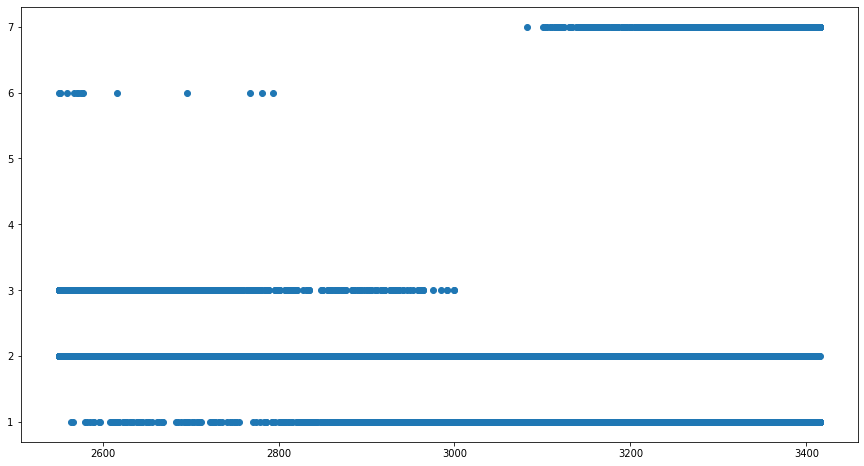

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.scatter(df_train_small_clean2.Elevation,df_train_small_clean2.Cover_Type)

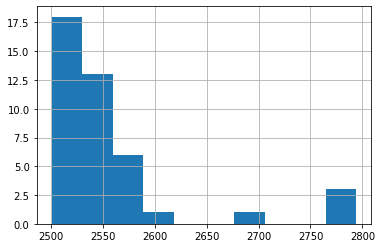

In [ ]:
df_train_small[(df_train_small.Cover_Type==6) & (df_train_small.Elevation > 2500)].Elevation.hist()

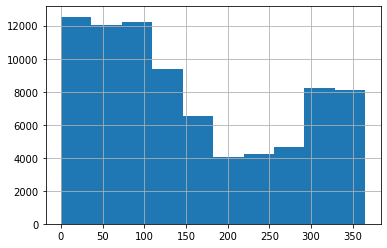

In [ ]:
df_train_small[df_train_small.Cover_Type==1].Aspect.hist()

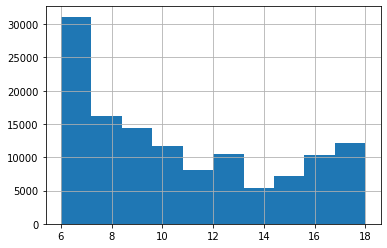

In [ ]:
df_train_small[df_train_small.Cover_Type==2].binned_aspect2.hist()

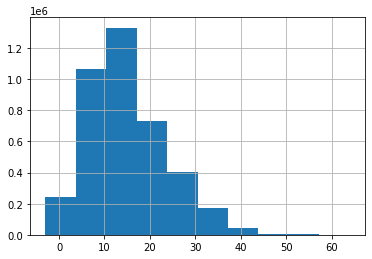

In [ ]:
df_train.Slope.hist()

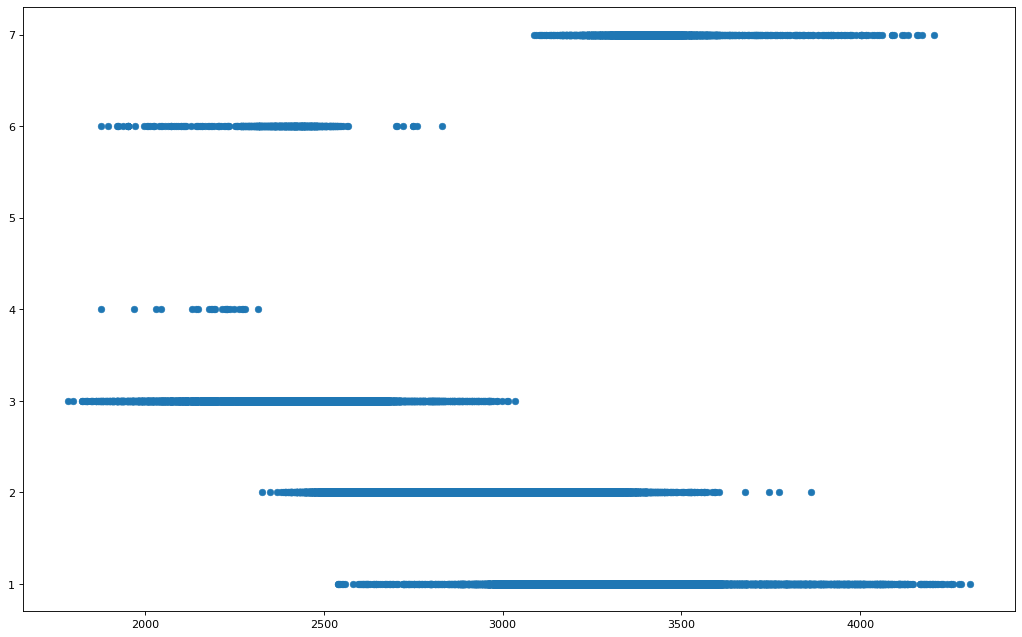

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
plt.scatter(df_train_small.Elevation, df_train_small.Cover_Type,linewidth=.5)

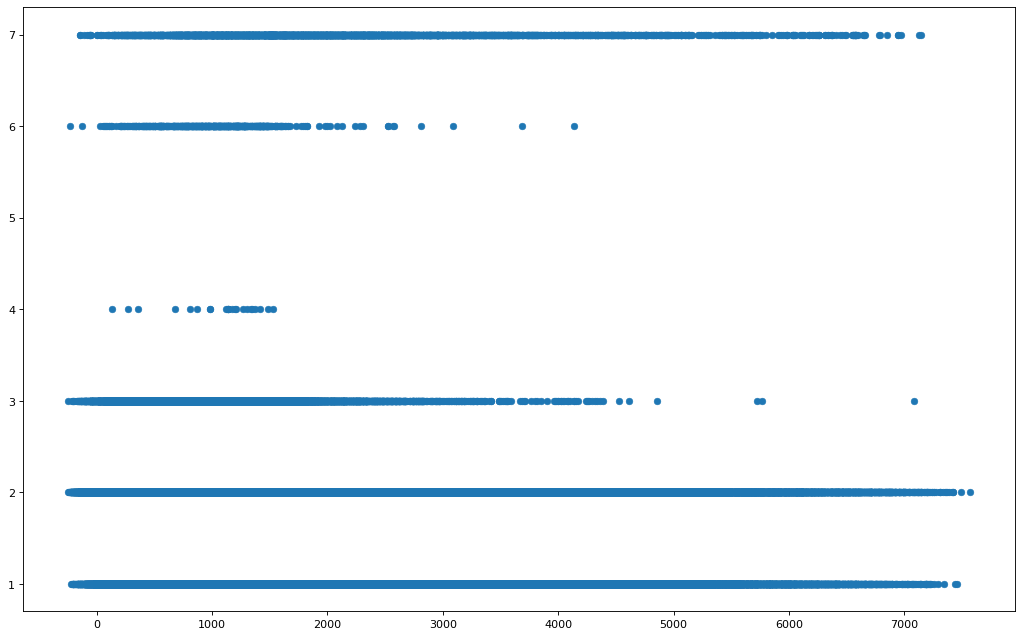

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
plt.scatter(df_train_small.Horizontal_Distance_To_Roadways, df_train_small.Cover_Type,linewidth=.5)

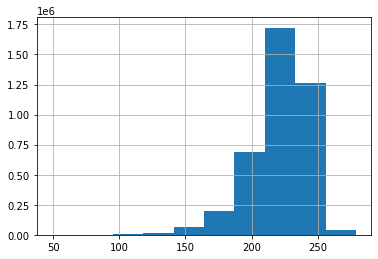

In [ ]:
df_train.Hillshade_Noon.hist()

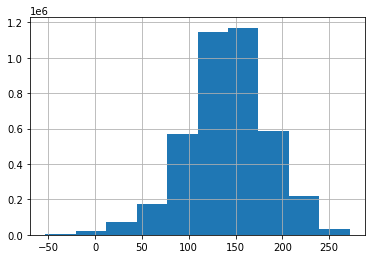

In [ ]:
df_train.Hillshade_3pm.hist()

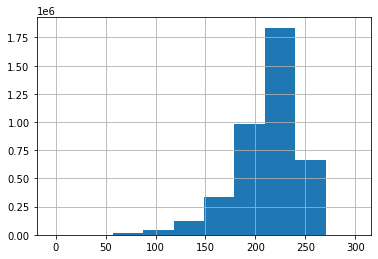

In [ ]:
df_train.Hillshade_9am.hist()

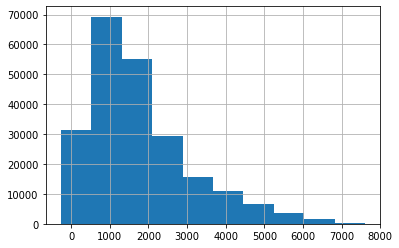

In [ ]:
df_train_small.Horizontal_Distance_To_Roadways.hist()

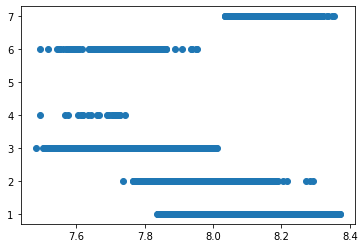

In [ ]:
plt.scatter(df_train_small.Elevation_log1p,df_train_small.Cover_Type)

In [ ]:
df_train_small.duplicated().value_counts()

False    217795
True       6205
dtype: int64

## Feature enginering

In [7]:
def feature_engineer(df):

    df.drop(columns=['Id'],axis=1,inplace=True)
    # Distance features
    # Euclidean distance to Hydrology
    df["ecldn_dist_hydrlgy"] = (
        df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2)**0.5
    df["fire_road"] = np.abs(df["Horizontal_Distance_To_Fire_Points"]) + \
        np.abs(df["Horizontal_Distance_To_Roadways"])

    # Elevation features
    df['highwater'] = (df.Vertical_Distance_To_Hydrology < 0).astype(int)

    # убираем выбросы
    # df.drop(df[np.abs(stats.zscore(df['Elevation'])) < 0.1].index,inplace=True)
    df['Elevation_log1p'] = np.log1p(df['Elevation'])
    # df.drop(columns=['Elevation'],inplace=True)

    # Aspect features, hardest FE
    df.loc[df["Aspect"] < 0, "Aspect"] += 360
    df.loc[df["Aspect"] > 359, "Aspect"] -= 360
    df['binned_aspect'] = [math.floor((v+60)/15.0) for v in df['Aspect']]
    df['binned_aspect2'] = [math.floor((v+180)/10.0) for v in df['Aspect']]

    # Soil and wilderness features
    soil_features = [x for x in df.columns if x.startswith("Soil_Type")]
    df["soil_type_count"] = df[soil_features].sum(axis=1)
    wilderness_features = [
        x for x in df.columns if x.startswith("Wilderness_Area")]
    df["wilderness_area_count"] = df[wilderness_features].sum(axis=1)
    df['area_and_soil'] = df.wilderness_area_count + df.soil_type_count

    # Hillshade features
    features_Hillshade = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
    df.loc[df["Hillshade_9am"] < 0, "Hillshade_9am"] = 0
    df.loc[df["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0
    df.loc[df["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0
    df.loc[df["Hillshade_9am"] > 255, "Hillshade_9am"] = 255
    df.loc[df["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255
    df.loc[df["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255
    df['Hillshade_Noon_is_bright'] = (df.Hillshade_Noon == 255).astype(int)
    df['Hillshade_9am_is_zero'] = (df.Hillshade_9am == 0).astype(int)
    df['hillshade_3pm_is_zero'] = (df.Hillshade_3pm == 0).astype(int)

    df['hillshade_noon_and_9pm'] = df.Hillshade_9am + df.Hillshade_Noon

    df.drop(["Aspect", 'Horizontal_Distance_To_Hydrology','soil_type_count'], axis=1, inplace=True)

    return df

In [ ]:
df_train_small.head()

,Id,Elevation,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,ecldn_dist_hydrlgy,fire_road,highwater,binned_aspect,binned_aspect2,soil_type_count,wilderness_area_count,soil_Type12_32,soil_Type23_22_32_33,Hillshade_Noon_is_bright,Hillshade_9am_is_zero,hillshade_3pm_is_zero
2968308,2968308,0.603831,4,0.356846,0.053565,105,224,122,0.370929,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.319603,0.197208,0,25,49,3,1,0,0,0,0,0
823195,823195,0.439080,13,0.432573,0.177166,219,219,114,0.146552,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0.212742,0.137685,0,10,28,2,1,0,0,0,0,0
2053691,2053691,0.390421,28,0.331950,0.141708,232,211,80,0.171097,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.239534,0.132541,0,5,19,0,1,0,0,0,0,0
3428625,3428625,0.530651,21,0.334025,0.064001,170,174,224,0.093511,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.335352,0.047966,0,6,22,1,1,0,0,0,0,0
1020743,1020743,0.411111,30,0.508299,0.230731,197,180,214,0.155651,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.313341,0.171221,0,5,19,1,1,0,0,0,0,0


In [46]:
df_train_small = feature_engineer(df_train_small)
df_test_small = feature_engineer(df_test_small)

In [8]:
# удалим пятый класс, так как он всего в одном экземпляре
df_train.drop(df_train[df_train.Cover_Type==5].index,inplace=True)

In [9]:
df_train = feature_engineer(df_train)
df_test = feature_engineer(df_test)

## Балансировка

Веса только ухудшали скор, поэтому я их не использовал, лишь удалил пятый класс и тренировочной выборки

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_train_small.drop(columns=['Cover_Type']), df_train_small.Cover_Type)

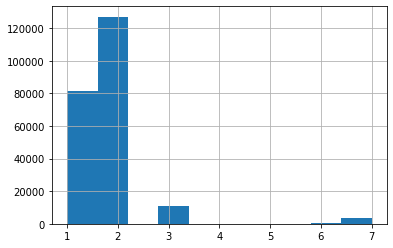

In [ ]:
df_train_small['Cover_Type'].hist()

In [ ]:
# тут грустно, надо что-то сделать. 
# upd Попытка использовать веса не удалась
# но можно обучать модель по метрике ROC-AUC, так как она не чувтсвительна к несбалансированному датасету
df_train_small.Cover_Type.value_counts()

2    127055
1     81755
3     11075
7      3435
6       652
4        28
Name: Cover_Type, dtype: int64

In [ ]:
classes = np.unique(df_train_small.Cover_Type)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=df_train_small.Cover_Type)
class_weights = dict(zip(classes, weights))

In [ ]:
class_weights

{1: 0.4566489307483742,
 2: 0.2938360027809479,
 3: 3.3709556057185854,
 4: 1333.3333333333333,
 6: 57.259713701431494,
 7: 10.86851043182921}

## Try simple models from sklearn

Не успел внедрить как-то новые модели, но наверное их можно было сблендить с ответами кэтбуста, если хорошо подобрать параметры

лучший результат по минивыборке у лог регрессии, например - 0.58

In [118]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [119]:
bay = SVC()

In [93]:
log = LogisticRegression(
    # class_weight='balanced',
                         penalty='l2',
                         C=10000,
                         n_jobs=-1,
                         max_iter=500)

In [52]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [53]:
df_train_4sklearn = clean_dataset(df_train_small)

In [54]:
X = df_train_4sklearn.drop(columns=['Cover_Type'])
y = df_train_4sklearn.Cover_Type

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size = 0.2)

In [120]:
bay.fit(X_train_scalled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


SVC()

In [102]:
scaller = StandardScaler()

In [103]:
X_train_scalled = scaller.fit_transform(X_train)

In [ ]:
log.fit(X_train_scalled,y_train)

In [116]:
# new
pred_tr = bay.predict(X_train_scalled)
mean_squared_error(pred_tr,y_train)

0.8334877232142858

In [38]:
# new
pred_tr = log.predict(X_train_scalled)
mean_squared_error(pred_tr,y_train)

0.5730930515698728

In [95]:
# new
pred_tr = log.predict(X_train_scalled)
mean_squared_error(pred_tr,y_train)

0.6514453125

In [117]:
confusion_matrix(y_train,pred_tr)

array([[64298,   386,     0,     0,     0,   682],
       [18801, 81713,   945,     0,    82,   226],
       [    9,  4756,  3126,    24,   854,     0],
       [    0,     0,    11,     0,     2,     0],
       [    0,   110,   106,     1,   287,     0],
       [ 2291,     0,     0,     0,     0,   490]])

In [82]:
confusion_matrix(y_train,pred_tr)

array([[61035,  3860,     0,     0,     0,   471],
       [ 4779, 96059,   919,     0,     6,     4],
       [    0,  1504,  7145,     0,   120,     0],
       [    0,     0,    12,     1,     0,     0],
       [    0,    98,   307,     0,    99,     0],
       [ 2074,     2,     0,     0,     0,   705]])

## CatBoost

In [11]:
!pip install catboost --quiet

     |████████████████████████████████| 76.3 MB 63 kB/s 


In [11]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from xgboost import XGBClassifier

In [15]:
del df_train

In [13]:
cat = CatBoostClassifier(iterations=500,
                          # learning_rate = 0.1,
                          early_stopping_rounds=30,
                          depth=4,
                          # class_weights=class_weights,
                          random_state=79637,
                          verbose = 10)

In [11]:
xgb =  XGBClassifier(random_state = 79637,n_estimators = 90, eta = 0.05, reg_alpha = 40, reg_lambda = 0.1,
                                colsample_bytree = 0.6, subsample  = 1)

In [12]:
X = df_train.drop(columns=['Cover_Type'])
y = df_train.Cover_Type

In [13]:
scaller = MinMaxScaler()

In [14]:
X = scaller.fit_transform(X)

In [15]:
df_test = scaller.transform(df_test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size = 0.2)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled[fts_cols],y_resampled, test_size = 0.2)

In [14]:
xgb.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.6, eta=0.05, n_estimators=90,
              objective='multi:softprob', random_state=79637, reg_alpha=40,
              reg_lambda=0.1)

In [ ]:
df_feat = pd.DataFrame({'feature_importance': cat.feature_importances_, 
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

In [ ]:
top_feat = list(df_feat.feature_names)[:-10]

In [ ]:
top_feat

['Elevation_log1p',
 'Elevation',
 'soil_type_count',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways',
 'Wilderness_Area3',
 'fire_road',
 'Vertical_Distance_To_Hydrology',
 'ecldn_dist_hydrlgy',
 'Soil_Type39',
 'Wilderness_Area1',
 'Soil_Type2',
 'Soil_Type10',
 'Soil_Type38',
 'Wilderness_Area4',
 'Soil_Type40',
 'Soil_Type4',
 'Soil_Type22',
 'soil_Type23_22_32_33',
 'Soil_Type1',
 'Hillshade_Noon',
 'Soil_Type35',
 'Soil_Type23',
 'Soil_Type37',
 'Hillshade_9am',
 'Soil_Type5',
 'Soil_Type36',
 'Soil_Type3',
 'soil_Type12_32',
 'Soil_Type11',
 'Wilderness_Area2',
 'Soil_Type24',
 'Soil_Type31',
 'Soil_Type13',
 'Soil_Type33',
 'Soil_Type6',
 'Id',
 'binned_aspect2',
 'Soil_Type29',
 'Soil_Type9',
 'Soil_Type14',
 'Soil_Type20',
 'Soil_Type19',
 'Soil_Type34',
 'Soil_Type16',
 'Soil_Type21',
 'Soil_Type12',
 'Hillshade_3pm',
 'Slope',
 'wilderness_area_count',
 'Soil_Type8',
 'Soil_Type30',
 'Hillshade_9am_is_zero',
 'Hillshade_Noon_is_bright',
 'Soil_Type

In [ ]:
pred_tr = cat.predict(X_train)
mean_squared_error(pred_tr,y_train)

0.33403822938694666

In [ ]:
# new
pred_tr = cat.predict(X_train)
mean_squared_error(pred_tr,y_train)

0.2813093203273301

In [ ]:
# new
pred_tr = cat.predict(X_train)
mean_squared_error(pred_tr,y_train)

0.29533015157372716

In [19]:
# new
pred_tr = xgb.predict(X_train)
mean_squared_error(pred_tr,y_train)

0.5208782877744649

In [17]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train,pred_tr)

array([[1131703,   35257,       0,       0,    7304],
       [  37574, 1758026,   13368,     545,     145],
       [      0,   17315,  138287,    1284,       0],
       [      0,    1311,    3490,    4391,       0],
       [  13802,     214,       0,       0,   35681]])

In [ ]:
confusion_matrix(y_train,pred_tr)

array([[1126782,   40878,       0,       0,       0,    7373],
       [  45720, 1748886,   14099,       0,     598,     134],
       [      0,   17877,  136886,      21,    1521,       0],
       [      0,       0,     265,      29,       8,       0],
       [      0,    1309,    3693,       0,    4108,       0],
       [  14409,     142,       0,       0,       0,   35261]])

In [20]:
confusion_matrix(y_train,pred_tr)

array([[1124078,   46808,       0,       0,       0,    3898],
       [  74066, 1725319,    9262,       0,     384,     118],
       [      0,   36854,  118952,       1,     979,       0],
       [      0,       0,     288,       4,       0,       0],
       [      0,    1372,    5374,       0,    2430,       0],
       [  35230,     108,       0,       0,       0,   14474]])

In [ ]:
pred = cat.predict(X_test)
mean_squared_error(pred,y_test)

1.872384662810069

In [ ]:
#new
pred = cat.predict(X_test)
mean_squared_error(pred,y_test)

0.2881825

In [ ]:
#new
pred = cat.predict(X_test)
mean_squared_error(pred,y_test)

0.31697975391276056

In [ ]:
explainer = shap.TreeExplainer(cat)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
del df_train

In [ ]:
df_test = feature_engineer(df_test)

In [16]:
submition = xgb.predict(df_test)
res = pd.DataFrame(submition)
res = pd.concat([df_test_Id,res],axis=1).set_index('Id')
res.columns=['Cover_Type']
res.to_csv('submission_xgb.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65aeb4fa90>]],
      dtype=object)

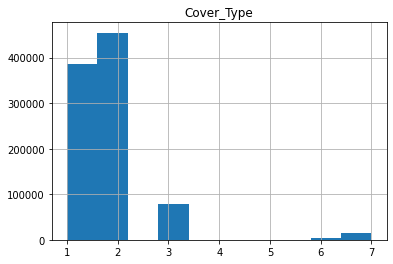

In [ ]:
res.hist()

## Median по лучшим результатам

In [43]:
df_1 = pd.read_csv("/content/1.csv")
df_2 = pd.read_csv("/content/2.csv")
df_3 = pd.read_csv("/content/3.csv")
df_4 = pd.read_csv("/content/4.csv")
df_5 = pd.read_csv("/content/5.csv")

In [44]:
df_all = pd.concat([df_1,df_2,df_3,df_4,df_5])

In [45]:
df_all = pd.DataFrame({
    'Id' : df_1.Id,
    'df_1' : df_1.Cover_Type,
    'df_2' : df_2.Cover_Type,
    'df_3' : df_3.Cover_Type,
    'df_4' : df_4.Cover_Type,
    'df_5' : df_5.Cover_Type
})

In [46]:
df_all

,Id,df_1,df_2,df_3,df_4,df_5
0,4000000,2,2,2,2,2
1,4000001,2,2,2,2,2
2,4000002,2,2,2,2,2
3,4000003,2,2,2,2,2
4,4000004,2,2,2,2,2
...,...,...,...,...,...,...
999995,4999995,2,2,2,2,2
999996,4999996,1,1,1,1,1
999997,4999997,2,2,2,2,2
999998,4999998,1,1,1,1,1


In [91]:
df_all['median'] = df_all[['df_1','df_2','df_3','df_4','df_5']].median(axis=1).astype(int)

In [92]:
df_all['median'].value_counts()

2    515800
1    387804
3     77206
7     14177
6      4849
4       164
Name: median, dtype: int64

In [93]:
submition = df_all['median']
res = pd.DataFrame(submition)
res = pd.concat([df_test_Id,res],axis=1).set_index('Id')
res.columns=['Cover_Type']
res.to_csv('submission_blend.csv')